#**2. Titanic Classification :**
Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

#**Datasets link:**

#**train.csv :**
 https://github.com/SyedAbdallahA/BharatDSintern/blob/main/train.csv

#**test.csv :**
https://github.com/SyedAbdallahA/BharatDSintern/blob/main/train.csv

Accuracy: 0.8536585365853658
Confusion Matrix:
[[ 6  5]
 [ 1 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.85      0.97      0.91        30

    accuracy                           0.85        41
   macro avg       0.86      0.76      0.79        41
weighted avg       0.85      0.85      0.84        41



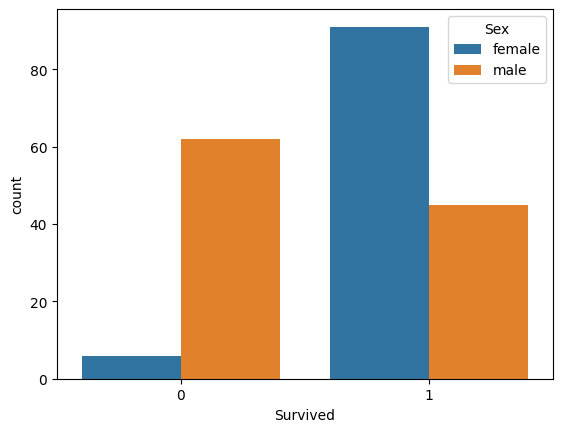

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check for missing values
train_df.isnull().sum()

# Dealing with missing values
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.dropna(subset=['Cabin'], inplace=True)

# Visualize data (e.g., survival rate by gender)
sns.countplot(x='Survived', hue='Sex', data=train_df)

# Define features and target variable
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df['Survived']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
confusion = confusion_matrix(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

# Preprocess the test data
test_data = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Handle missing values in the test data
test_data['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_data['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

# Scale features in the test data
test_data = scaler.transform(test_data)

# Make predictions on the test data
test_predictions = clf.predict(test_data)

# Create a DataFrame with the PassengerId and the predicted Survived values
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

# Save the DataFrame to a CSV file for submission
submission_df.to_csv('titanic_submission.csv', index=False)


# **titanic_submission.csv :**

https://github.com/SyedAbdallahA/BharatDSintern/blob/main/titanic_submission.csv